In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tarfile
from PIL import Image

### area of interest

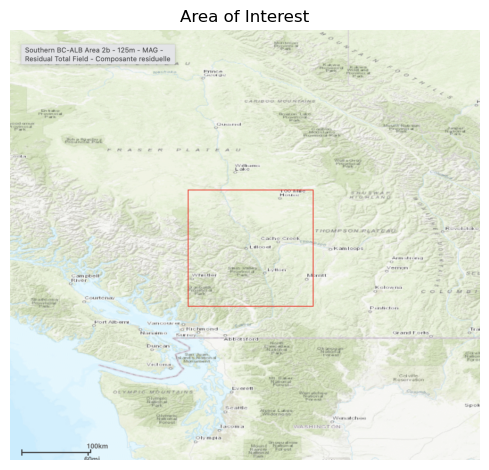

In [2]:
img = np.asarray(Image.open("area.png"))
imgplot = plt.imshow(img)
plt.axis("off")
plt.title("Area of Interest")
plt.tight_layout()
plt.show()

In [3]:
df = pd.read_csv(
    "data/gsc_s_bc_alb_2b.csv",
    header=None,               
    skiprows=9,               
    names=[
        "X",          
        "Y",         
        "TIME",       
        "MAGLEV",      
        "SRVMGLEV",   
        "MAGADJ",      
        "DIURNAL",    
        "MAGDIST",     
        "RALT",       
        "BALT",        
        "FLIGHT",      
        "MAGLEV_used",
        "LINE",       
        "LINETYPE",    
        "LINENAME",   
        "Extra"       
    ],
    sep=",",                  
    engine="python",
    skipinitialspace=True
)

print(df.shape)
df


(120726, 16)


,X,Y,TIME,MAGLEV,SRVMGLEV,MAGADJ,DIURNAL,MAGDIST,RALT,BALT,FLIGHT,MAGLEV_used,LINE,LINETYPE,LINENAME,Extra
0,-123.0197,51.2383,552.00,-9.97,57124.78,13.47,57939.4,12.5,1092.71,3306.00,16,f,11281,L,L11281,NaN
1,-123.0202,51.2383,552.17,-9.97,57124.71,13.47,57939.2,10.6,1092.71,3306.00,16,f,11281,L,L11281,NaN
2,-123.0207,51.2383,552.33,-10.01,57124.62,13.47,57939.1,8.7,1085.09,3306.00,16,f,11281,L,L11281,NaN
3,-123.0213,51.2383,552.50,-10.12,57124.52,13.47,57939.1,6.4,1085.09,3306.00,16,f,11281,L,L11281,NaN
4,-123.0218,51.2383,552.67,-10.26,57124.40,13.47,57939.2,4.5,1078.99,3306.00,16,f,11281,L,L11281,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120721,-121.9102,51.5277,2316.50,65.12,57538.93,5.39,57946.9,1020.3,1313.69,2389.14,27,f,11590,L,L11590,NaN
120722,-121.9107,51.5276,2316.67,64.18,57538.65,5.39,57946.9,1019.4,1313.69,2389.14,27,f,11590,L,L11590,NaN
120723,-121.9113,51.5275,2316.83,62.74,57538.30,5.39,57946.9,1018.2,1315.21,2387.10,27,f,11590,L,L11590,NaN
120724,-121.9117,51.5272,2317.00,61.87,57537.91,5.39,57946.9,1017.2,1312.16,2387.10,27,f,11590,L,L11590,NaN


In [4]:
# Remove the outlier of the graph (Value of 50000)
# df_outlier = df.sort_values(by='BALT', ascending=False)
# df_outlier.iloc[0:74]

df_new = df.loc[df['BALT']<3000]
df_new.sort_values(by='BALT', ascending=False).iloc[0:120]

df.sort_values(by='FLIGHT', ascending=False)

,X,Y,TIME,MAGLEV,SRVMGLEV,MAGADJ,DIURNAL,MAGDIST,RALT,BALT,FLIGHT,MAGLEV_used,LINE,LINETYPE,LINENAME,Extra
8446,-122.1637,51.0357,1087.17,40.07,57324.06,-65.49,57907.2,200.8,248.41,2456.53,100,t,11061,L,L11061,NaN
25549,-122.3012,51.1597,712.50,359.19,57626.94,-87.54,57887.0,234.4,577.60,2466.74,100,t,11191,L,L11191,NaN
25556,-122.3050,51.1598,713.67,379.67,57640.60,-87.54,57887.2,240.1,565.40,2464.69,100,t,11191,L,L11191,NaN
25555,-122.3046,51.1598,713.50,377.82,57638.92,-87.54,57887.2,239.5,566.93,2464.69,100,t,11191,L,L11191,NaN
25554,-122.3039,51.1598,713.33,374.49,57637.14,-87.54,57887.2,238.5,568.45,2466.74,100,t,11191,L,L11191,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113657,-122.4006,51.4743,1121.33,155.75,57671.32,14.43,57959.6,934.5,1200.91,2444.27,9,t,11540,L,L11540,NaN
113658,-122.4012,51.4743,1121.50,156.40,57672.55,14.43,57958.9,935.9,1200.91,2444.27,9,t,11540,L,L11540,NaN
113659,-122.4017,51.4743,1121.67,156.96,57673.74,14.43,57958.9,937.0,1194.82,2444.27,9,t,11540,L,L11540,NaN
113660,-122.4021,51.4743,1121.83,157.44,57674.90,14.44,57959.7,937.9,1194.82,2444.27,9,t,11540,L,L11540,NaN


In [5]:
from scipy.interpolate import griddata

# Define grid
xi = np.linspace(df_new["X"].min(), df_new["X"].max(), 300)
yi = np.linspace(df_new["Y"].min(), df_new["Y"].max(), 300)
X, Y = np.meshgrid(xi, yi)

Z = griddata((df_new["X"], df_new["Y"]), df_new["BALT"], (X, Y), method='linear')
Z2 = griddata((df_new["X"], df_new["Y"]), df_new["MAGLEV"], (X, Y), method='linear')

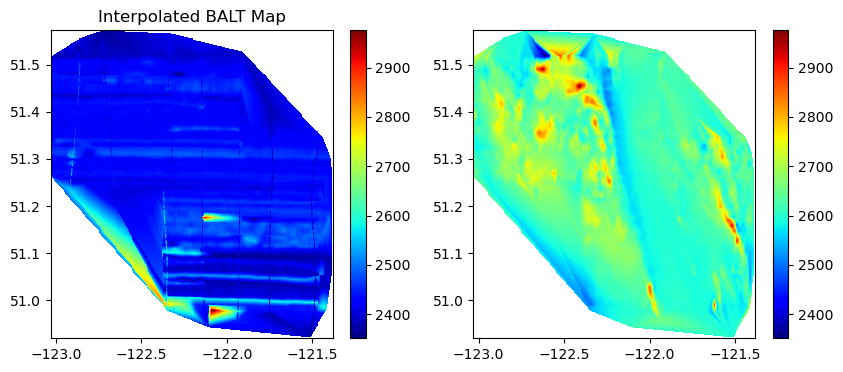

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

c = ax[0].pcolormesh(X, Y, Z, shading='auto',  cmap="jet")
fig.colorbar(c, ax=ax[0])
ax[0].set_title("Interpolated BALT Map")

c2 = ax[1].pcolormesh(X, Y, Z2, shading = 'auto',  cmap="jet")
fig.colorbar(c, ax=ax[1])

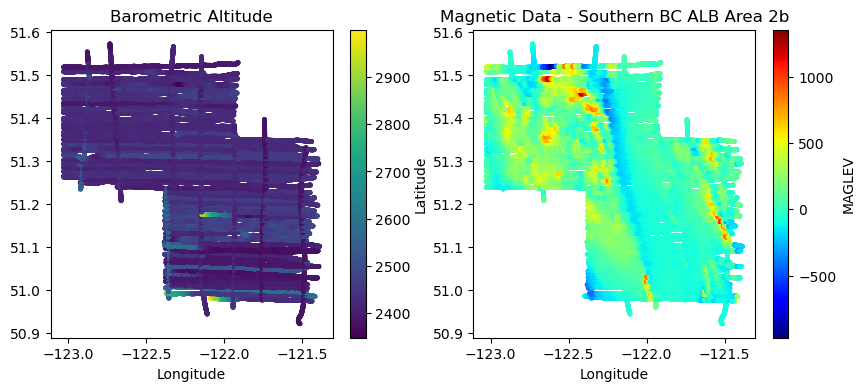

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))

sc1 = ax[0].scatter(df_new["X"], df_new["Y"], c=df_new["BALT"], s=6)
ax[0].set_xlabel("Longitude")
ax[0].set_ylabel = ("Latitude")
fig.colorbar(sc1, ax = ax[0])
ax[0].set_title("Barometric Altitude")


sc2 = ax[1].scatter(df["X"], df["Y"], c=df["MAGLEV"], cmap="jet", s=6)
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")
# plt.contour([df["X"], df["Y"]], df["MAGLEV"])
fig.colorbar(sc2, ax=ax[1], label="MAGLEV")
ax[1].set_title("Magnetic Data - Southern BC ALB Area 2b")
plt.show()



### Slice the data at the latitude of 51.3

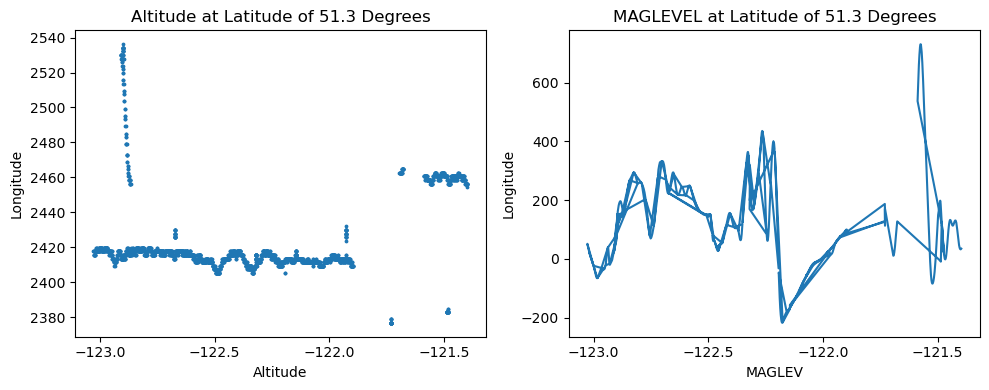

In [41]:
# filter the data at latitude of 51.3

filter_df = df_new[(df_new["Y"] > 51.295) & (df_new["Y"] < 51.305)]

fig, ax = plt.subplots(1, 2, figsize = (10, 4))

ax[0].scatter(filter_df["X"], filter_df["BALT"], s = 3)
ax[0].set_xticks([-123, -122.5, -122, -121.5])
ax[0].set_title("Altitude at Latitude of 51.3 Degrees")
ax[0].set_xlabel("Altitude")
ax[0].set_ylabel("Longitude")

ax[1].plot(filter_df["X"], filter_df["MAGLEV"])
ax[1].set_xticks([-123, -122.5, -122, -121.5])
ax[1].set_title("MAGLEVEL at Latitude of 51.3 Degrees")
ax[1].set_xlabel("MAGLEV")
ax[1].set_ylabel("Longitude")

plt.tight_layout()
plt.show()

In [44]:
maximum_anomaly = np.max(np.abs(filter_df["MAGLEV"]))

std = 0.02 * maximum_anomaly * np.ones(len(filter_df))
# len(filter_df)

2763